# Importing Data Set

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('Height-Weight Data.csv')
print(df.head())
print(df.shape)

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801
(3501, 2)


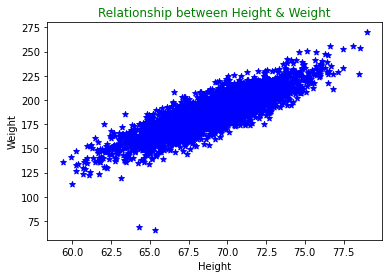

In [10]:
plt.scatter(df.Height, df.Weight, color='blue', marker='*')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Relationship between Height & Weight', color='green')
plt.savefig('Height vs Weight.jpg')

# Split the Dataset to Separate "Testing" & "Training"

In [12]:
x = df[['Height']]
y = df['Weight']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=0.30)    #training data = 70%

In [15]:
xtrain.head()

,Height
2257,69.346474
1732,67.590168
246,65.187221
809,69.571430
723,70.698790


In [16]:
ytrain.head()

2257    181.851584
1732    174.009152
246     172.606483
809     182.154139
723     189.985479
Name: Weight, dtype: float64

# Model Creation - Linear Regression Model_to find m & c

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()         #creating an object/model for Linear Regression

In [19]:
reg.fit(xtrain, ytrain)          #training ML model

LinearRegression()

In [21]:
m = reg.coef_          #to see coefficient/slope of the tarined model
m

array([6.00003876])

In [22]:
c = reg.intercept_     #to see intercept of the tarined model
c

-227.2778938439128

In [24]:
x1 = 69.346474
y1 = (m*x1)+c
y1

array([188.8036381])

In [25]:
reg.predict([[69.346474]])    #to predict any value of x from the "BEST FIT" ML model

C:\Users\Sajib Khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([188.8036381])

In [26]:
df['predicted results'] = reg.predict(x)    #to create a new column in main dataset of "Predicted results"; After Training
df

,Height,Weight,predicted results
0,73.847017,241.893563,215.807071
1,68.781904,162.310473,185.416197
2,74.110105,212.740856,217.385611
3,71.730978,220.042470,203.110757
4,69.881796,206.349801,192.015590
...,...,...,...
3496,69.296830,185.649086,188.505772
3497,70.542201,210.198845,195.978049
3498,73.912549,202.429960,216.200266
3499,67.396021,144.277671,177.100843


In [32]:
pred = reg.predict(xtest)       #to get corresponding ytest value; after Linear Regression
pred

array([183.52202604, 191.56846322, 191.38493104, ..., 188.23449771,
       202.36739653, 183.24465475])

In [33]:
from sklearn.metrics import mean_squared_error       #to know the MSE

MSE = mean_squared_error(ytest, pred)
MSE

102.01814333866751

In [34]:
from sklearn.metrics import mean_absolute_error       #to know the MAE

MAE = mean_absolute_error(ytest, pred)
MAE

8.060496845576349

# Best Fit Line

InvalidIndexError: (slice(None, None, None), None)

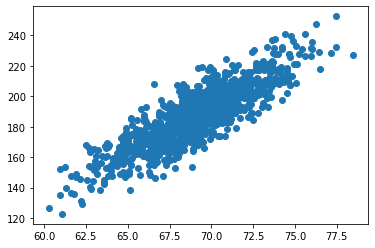

In [41]:
plt.scatter(xtest, ytest)
plt.plot(xtest, reg.predict(xtest), marker = 'o', color='black')